<a href="https://colab.research.google.com/github/crinex/what-is-neural_network/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network

### Neuron Model
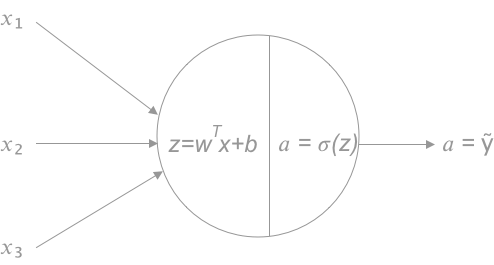

- 뉴럴 네트워크는 하나의 뉴런, 즉 로지스틱 모델을 유닛이라 하고 그 유닛들을 연결한 구조이다.
- 유닛들을 모아서 레이어를 형성한다.
- 아래와 같은 모델은 2-Layer Neural Network이다.
- 4개의 유닛들로 구성된 Hidden Layer 한개와 1개의 유닛으로 구성된 Output Layer 1개로 되어있다.

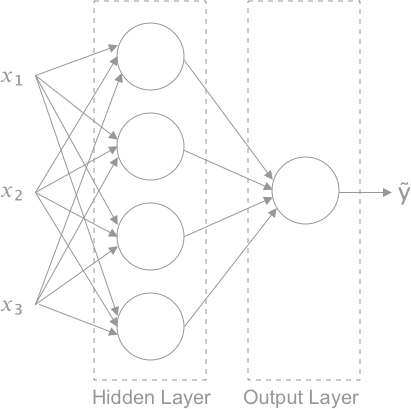

In [ ]:
input_data = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
]

output_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

- 위 문제는 데이터의 규칙에 따라 출력값을 결정하는 문제다.
- 이 규칙을 학습 시켜서 원하는 출력값으로 분류하는 네트워크를 만들어보자

### Data Transform
- Keras가 원하는 데이터 입출력 모양(shape)은 다음과 같다.
  
  - (batch_size, input_demention)
  - batch_size : 학습할 데이터의 개수
  - input_demention : 학습을 할 때에 사용할 입력 변수의 개수

In [ ]:
print('batch_size =', len(input_data))

batch_size = 10


In [ ]:
print('input_demention = ', len(input_data[0]))

input_demention =  10


In [ ]:
import numpy as np

x = np.array(input_data)
x.shape

(10, 10)

- 출력이 0과 1 두개로 분류되는 문제가 아니다.
- 0~9 까지 총 10개의 출력 데이터가 있다.
- 이럴 경우 one-hot encoding을 이용해 0과 1로 데이터를 표현한다.

In [ ]:
from keras.utils import to_categorical

In [ ]:
y = to_categorical(output_data)
print(y.shape)
print(y)

(10, 10)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
x_data = np.array([
    (1,4), (1,5), (1,6), (1,7), (1,8), (2,5), (2,6), (2,7), (2,8), (2,9), 
    (3,6), (3,7), (3,8), (3,9), (4,7), (4,8), (4,9), (5,8), (5,9), (6,9),
    (3,1), (4,1), (4,2), (5,1), (5,2), (5,3), (6,1), (6,2), (7,1), (8,1),
    (7,5), (8,4), (8,5), (8,6), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8)
])

y_data = np.array([
    [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], 
    [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0], [1,0,0],
    [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0], [0,1,0],
    [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1], [0,0,1]
])

## Network Modeling
- 입력 레이어는 x1 ~ x10 까지 10개로 되어있다.
- 히든 레이어는 3개의 유닛으로 구성한다.
- 출력 레이어는 10개의 유닛으로 구성한다.
- 히든 레이어의 활성함수는 Sigmoid로 한다.
- 출력 레이어의 활성함수는 출력값들의 총합이 1이여야 하므로 Softmax로 한다.

In [ ]:
from keras import Sequential
from keras.layers import Dense, Activation

In [ ]:
model = Sequential()
model.add(Dense(3, input_shape=(2,), activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop'
)
hist = model.fit(x_data, y_data, epochs=1000, verbose=0)

In [ ]:
X_train = x
Y_train = y

In [ ]:
model = Sequential()
model.add(Dense(3, input_shape=(10,), activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop'
)
hist = model.fit(X_train, Y_train, epochs=10000, verbose=0)

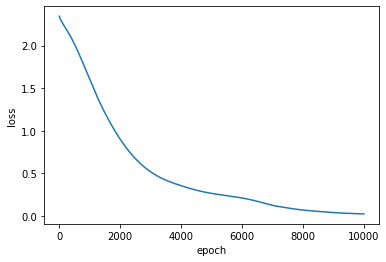

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()